In [26]:
import os
import sys
import time
import torch
import shutil
import random
import zipfile
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [25]:
len(os.listdir('N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/Tomato___Late_blight'))

1910

### Data download

svn checkout https://github.com/spMohanty/PlantVillage-Dataset/trunk/raw/color/{folder_of_interest}

### Renaming the files of interest

In [118]:
folderpath = 'N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/'
#folders = ['potato_early', 'potato_late', 'potato_healthy', 'tomato_early', 'tomato_late', 'tomato_healthy']
folders = ['potato_healthy']
for fol in range(len(folders)):
    print(folderpath+folders[fol])
    for i in range(len(os.listdir(folderpath+folders[fol]))):
        if os.listdir(folderpath+folders[fol])[i].endswith('.svn'):
            print('Another svn file which will be ignored')
        else:
            fp = folderpath+folders[fol]
            os.rename(os.path.join(fp, os.listdir(folderpath+folders[fol])[i]), f'{fp}/{folders[fol]}_{i}.JPG')

N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/potato_healthy
Another svn file which will be ignored


---------------------

In [2]:
directory_in_use = os.listdir('../Data Augmentation')#/Potato_healthy_new')
directory_in_use

['.ipynb_checkpoints',
 '1. data aug for potato healthy images.ipynb',
 'Potato_healthy_new']

In [3]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('../Potato___healthy/potato_healthy_1.JPG'))
torch.manual_seed(0)

In [10]:
#Rotating the original image in three different ways
# rotated_imgs = [T.RandomRotation(degrees=d)(orig_img) for d in range(50,151,50)]
# rotated_imgs

center_crops = [T.CenterCrop(size=size)(orig_img) for size in (128,64, 32)]
center_crops

[<PIL.Image.Image image mode=RGB size=128x128 at 0x171370CCB48>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x171370D5048>,
 <PIL.Image.Image image mode=RGB size=32x32 at 0x171370CCE48>]

In [12]:
np.asarray(center_crops[-2]).shape

(64, 64, 3)

In [13]:
T.Resize?

In [237]:
total_sum = 0
for folder in os.listdir('../')[2:]:
    total_sum += len(os.listdir(os.path.join("N:/DesktopSettings/Desktop/Sem3/Dissertation/Image Dataset/", folder)))
    print(f"Len files in {folder}: {len(os.listdir(os.path.join('N:/DesktopSettings/Desktop/Sem3/Dissertation/Image Dataset/', folder)))}\n")
total_sum

Len files in Potato___Early_blight: 3737

Len files in Potato___healthy: 3547

Len files in Potato___Late_blight: 3310

Len files in Tomato_Early_blight: 3560

Len files in Tomato_healthy: 3671

Len files in Tomato_Late_blight: 3419



21244

In [283]:
def augment_images_in(folderpath, destination_folder):
    """1. Takes folderpath and destination folder paths as arguments.
       2. Loops through all images in folderpath and does some data 
       augmentation processes to them and saves these newly augmented images to the destination folder"""
    start_time = time.time()
    #
    #total_number = int(input("What is the total number of images to obtain at the end? "))
    #Calculate how many different kinds of augmentations need to be done in order to obtain the total num images at the end
    
    #Loop through images in folder and read the image
    choice = int(input('Make a choice: \n1. All files in folderpath'+
                                      '\n2. Random number of samples from folder path '+
                                      '\n3. Only specific random samples from folder path'+
                                      '\n4. Continue from highest num but still augment orignal images '))
    if choice ==1: 
        for img in os.listdir(folderpath):
            if img.endswith('.svn'):
                print(f'Ignoring {img} file')
            else:
                print(f"{img}\n")
                #Read image
                image = Image.open(Path(f'{folderpath}/{img}'))

                #Random Rotation
                rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(50,130,120)]
                for img_idx in range(len(rotated_imgs)):
                    rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")

                #Center Crop
                center_crops = [T.CenterCrop(size=size)(image) for size in (240, 220, 200, 180)]
                for img_idx in range(len(center_crops)):
                    center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")

                #Gaussian Blur
                blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (1, 1.5, 2, 2.5)]
                for img_idx in range(len(blurred_imgs)):
                    blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG")
                
    elif choice==2:
        randomly_selcted_files = []
        randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
        for rn in range(randnum):
            randomly_selcted_files.append(random.choice(os.listdir(folderpath)))

        randomly_selcted_files
        for img in randomly_selcted_files:
            if img.endswith('.svn'):
                print(f'Ignoring {img} file')
            else:
                print(f"{img}\n")
                #Read image
                image = Image.open(Path(f'{folderpath}/{img}'))

                #Random Rotation
                rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(50,70,130)]
                for img_idx in range(len(rotated_imgs)):
                    rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")

                #Center Crop
                center_crops = [T.CenterCrop(size=size)(image) for size in (240, 220, 200, 180)]
                for img_idx in range(len(center_crops)):
                    center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")

                #Gaussian Blur
                blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (1, 1.5, 2, 2.5)]
                for img_idx in range(len(blurred_imgs)):
                    blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG") 
                
    elif choice==3: #augmenting only original images
        files_to_select_from = [file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))==3]
        specific_randomly_selcted_files = []
        randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
        for rn in range(randnum):
                    specific_randomly_selcted_files.append(random.choice(files_to_select_from))
        specific_randomly_selcted_files
#         lastfile_in_folder = files_to_select_from[-1]
#         highestnum_in_folder = int(lastfile_in_folder.split('_')[-1].split('.')[0])
#         print(f"Highest num in folder is {highestnum_in_folder}\n")     
        numbers_list = []
        for i in files_to_select_from:
            numbers_list.append(int(i.split('.JPG')[0].split('_')[-1]))
            numbers_list = sorted(numbers_list)

        highestnum_in_folder = numbers_list[-1]
        print(f"Highest num in folder is {highestnum_in_folder}\n")
        
        
        print(len(specific_randomly_selcted_files))
        print(len(set(specific_randomly_selcted_files)))
        for img in specific_randomly_selcted_files:
            if img.endswith('.svn'):
                print(f'Ignoring {img} file')
            else:
                print(f"{img}\n")
                #Read image
                image = Image.open(Path(f'{folderpath}/{img}'))

                #Random Rotation
                rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(100,130, 150)]
                for img_idx in range(len(rotated_imgs)):
                   #rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")
                   rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_rrot_{img_idx+1}.JPG")
                print('==========================================================\n')

                #Center Crop
                center_crops = [T.CenterCrop(size=size)(image) for size in (230, 210, 190, 170)]
                for img_idx in range(len(center_crops)):
                    #center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")
                    center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_ccrp_{img_idx+1}.JPG")
                print('==========================================================\n')

                #Gaussian Blur
                blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (1, 1.5, 2, 2.5)]
                for img_idx in range(len(blurred_imgs)):
                    #blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG") 
                    blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_gblr_{img_idx+1}.JPG")
                print('==========================================================\n')
                highestnum_in_folder = highestnum_in_folder+1
                print(f'\n{highestnum_in_folder}')
    
    #fourth option which will augment original images only but will continue the augmentation from the highest number in the folder
    elif choice==4: #augmenting only original images
        files_to_select_from = [file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))==3]
        hn  = [file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))>3]
        specific_randomly_selcted_files = []
        randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
        for rn in range(randnum):
                    specific_randomly_selcted_files.append(random.choice(files_to_select_from))
        specific_randomly_selcted_files
#         lastfile_in_folder = files_to_select_from[-1]
#         highestnum_in_folder = int(lastfile_in_folder.split('_')[-1].split('.')[0])
#         print(f"Highest num in folder is {highestnum_in_folder}\n")     
        numbers_list = []
        for i in hn:
            numbers_list.append(int(i.split('_')[2]))
            numbers_list = sorted(numbers_list)

        highestnum_in_folder = numbers_list[-1]
        print(f"Highest num in folder is {highestnum_in_folder}\n")
        
        
        print(len(specific_randomly_selcted_files))
        specific_randomly_selcted_files = set(specific_randomly_selcted_files)
        print(len(set(specific_randomly_selcted_files)))
        for img in specific_randomly_selcted_files:
            if img.endswith('.svn'):
                print(f'Ignoring {img} file')
            else:
                print(f"{img}\n")
                #Read image
                image = Image.open(Path(f'{folderpath}/{img}'))

                #Random Rotation
                rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(100,130, 150)]
                for img_idx in range(len(rotated_imgs)):
                   #rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")
                   rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_rrot_{img_idx+1}.JPG")
                print('==========================================================\n')

                #Center Crop
                center_crops = [T.CenterCrop(size=size)(image) for size in (230, 210, 190, 170)]
                for img_idx in range(len(center_crops)):
                    #center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")
                    center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_ccrp_{img_idx+1}.JPG")
                print('==========================================================\n')

                #Gaussian Blur
                blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (1, 1.5, 2, 2.5)]
                for img_idx in range(len(blurred_imgs)):
                    #blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG") 
                    blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_gblr_{img_idx+1}.JPG")
                print('==========================================================\n')
                highestnum_in_folder = highestnum_in_folder+1
                print(f'\n{highestnum_in_folder}')
    
    
    
    return f'It took {time.time()-start_time}sec(s) to do the augmentation for files in {folderpath}'

augment_images_in(folderpath = 'N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late',
                  destination_folder = 'N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late')

Make a choice: 
1. All files in folderpath
2. Random number of samples from folder path 
3. Only specific random samples from folder path
4. Continue from highest num but still augment orignal images 3
Enter the number of random files you want to select from N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late: 177
Highest num in folder is 1909

177
168
tomato_late_571.JPG





1910
tomato_late_906.JPG





1911
tomato_late_526.JPG





1912
tomato_late_710.JPG





1913
tomato_late_1690.JPG





1914
tomato_late_205.JPG





1915
tomato_late_1186.JPG





1916
tomato_late_770.JPG





1917
tomato_late_1036.JPG





1918
tomato_late_1233.JPG





1919
tomato_late_1214.JPG





1920
tomato_late_1181.JPG





1921
tomato_late_280.JPG





1922
tomato_late_1468.JPG





1923
tomato_late_1303.JPG





1924
tomato_late_1823.JPG





1925
tomato_late_1100.JPG





1926
tomato_late_1347.JPG





1927
tomato_late_166.JPG





1928
tomato



1947
tomato_late_650.JPG





1948
tomato_late_136.JPG





1949
tomato_late_730.JPG





1950
tomato_late_1406.JPG





1951
tomato_late_1614.JPG





1952
tomato_late_1531.JPG





1953
tomato_late_1782.JPG





1954
tomato_late_1450.JPG





1955
tomato_late_1576.JPG





1956
tomato_late_166.JPG





1957
tomato_late_1805.JPG





1958
tomato_late_1296.JPG





1959
tomato_late_690.JPG





1960
tomato_late_1514.JPG





1961
tomato_late_1553.JPG





1962
tomato_late_20.JPG





1963
tomato_late_1307.JPG





1964
tomato_late_1872.JPG





1965
tomato_late_1332.JPG





1966
tomato_late_732.JPG





1967
tomato_late_1554.JPG





1968
tomato_late_853.JPG





1969
tomato_late_1850.JPG





1970
tomato_late_281.JPG





1971
tomato_late_1159.JPG





1972
tomato_late_1718.JPG





1973
tomato_late_339.JPG





1974
tomato_late_370.JPG





1975
tomato_late_924.JPG





1976
tomato_late_533.JPG





1977
tomato_late_276.JPG





1978
tomato_late_525.JPG





1979
tomato_late_163.J




1987
tomato_late_732.JPG





1988
tomato_late_1121.JPG





1989
tomato_late_105.JPG





1990
tomato_late_1857.JPG





1991
tomato_late_985.JPG





1992
tomato_late_698.JPG





1993
tomato_late_1542.JPG





1994
tomato_late_14.JPG





1995
tomato_late_655.JPG





1996
tomato_late_867.JPG





1997
tomato_late_2.JPG





1998
tomato_late_498.JPG





1999
tomato_late_12.JPG





2000
tomato_late_1455.JPG





2001
tomato_late_936.JPG





2002
tomato_late_315.JPG





2003
tomato_late_500.JPG





2004
tomato_late_1904.JPG





2005
tomato_late_529.JPG





2006
tomato_late_701.JPG





2007
tomato_late_1746.JPG





2008
tomato_late_685.JPG





2009
tomato_late_1854.JPG





2010
tomato_late_321.JPG





2011
tomato_late_1634.JPG





2012
tomato_late_1643.JPG





2013
tomato_late_469.JPG





2014
tomato_late_762.JPG





2015
tomato_late_1429.JPG





2016
tomato_late_28.JPG





2017
tomato_late_691.JPG





2018
tomato_late_1089.JPG





2019
tomato_late_1875.JPG










2027
tomato_late_458.JPG





2028
tomato_late_384.JPG





2029
tomato_late_1454.JPG





2030
tomato_late_67.JPG





2031
tomato_late_955.JPG





2032
tomato_late_1154.JPG





2033
tomato_late_705.JPG





2034
tomato_late_300.JPG





2035
tomato_late_1777.JPG





2036
tomato_late_1091.JPG





2037
tomato_late_1037.JPG





2038
tomato_late_1105.JPG





2039
tomato_late_1695.JPG





2040
tomato_late_1237.JPG





2041
tomato_late_910.JPG





2042
tomato_late_1504.JPG





2043
tomato_late_517.JPG





2044
tomato_late_194.JPG





2045
tomato_late_905.JPG





2046
tomato_late_391.JPG





2047
tomato_late_1670.JPG





2048
tomato_late_1163.JPG





2049
tomato_late_660.JPG





2050
tomato_late_552.JPG





2051
tomato_late_1854.JPG





2052
tomato_late_1575.JPG





2053
tomato_late_340.JPG





2054
tomato_late_1031.JPG





2055
tomato_late_251.JPG





2056
tomato_late_707.JPG





2057
tomato_late_971.JPG





2058
tomato_late_1753.JPG





2059
tomato_late_1708.J





2067
tomato_late_1883.JPG





2068
tomato_late_673.JPG





2069
tomato_late_1612.JPG





2070
tomato_late_1827.JPG





2071
tomato_late_191.JPG





2072
tomato_late_257.JPG





2073
tomato_late_663.JPG





2074
tomato_late_1410.JPG





2075
tomato_late_1048.JPG





2076
tomato_late_152.JPG





2077
tomato_late_945.JPG





2078
tomato_late_1038.JPG





2079
tomato_late_1364.JPG





2080
tomato_late_886.JPG





2081
tomato_late_1139.JPG





2082
tomato_late_50.JPG





2083
tomato_late_1100.JPG





2084
tomato_late_585.JPG





2085
tomato_late_688.JPG





2086


'It took 789.6410727500916sec(s) to do the augmentation for files in N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late'

In [265]:
"potato_healthy_209_gblr_1.JPG".split('_')[2]

'209'

In [266]:
files_to_select_from = [file for file in os.listdir(f'{folderpath}/potato_healthy') if len(file.split('.')[0].split('_'))>3]
numbers_list = []
for i in files_to_select_from:
    numbers_list.append(int(i.split('_')[2]))
    numbers_list = sorted(numbers_list)

highestnum_in_folder = numbers_list[-1]
print(f"Highest num in folder is {highestnum_in_folder}\n")

Highest num in folder is 282



---------------------------------------

In [351]:
folderpath = 'N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late'

image = Image.open(Path(f'{folderpath}/{os.listdir(folderpath)[5]}'))
rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(50, 70, 130)]
rotated_imgs2 = [T.RandomRotation(degrees=d)(image) for d in range(100,130, 150)]
center_crops = [T.CenterCrop(size=size)(image) for size in (230, 210, 190, 170)]
blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (1, 1.5, 2, 2.5)]

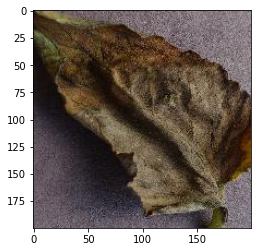

In [81]:
plt.imshow(rotated_imgs[2])

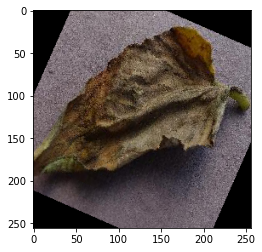

In [91]:
plt.imshow(rotated_imgs2[0])

Show size or label: 
1. Show size
2. Show label :2
Enter label of imageGBlurred1 GBlurred2 GBlurred3 GBlurred4


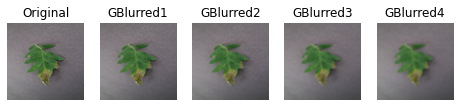

In [352]:
plot(image, blurred_imgs)

In [346]:
def plot(original, resized_imgs_list):
    """Plotter function which plots oringal and resized images"""
    fig, ax = plt.subplots(1, len(resized_imgs_list)+1)
    plt.rcParams['figure.figsize']=[8,8]
    ax[0].imshow(original)
    ax[0].title.set_text('Original')
    
    choice = int(input('Show size or label: \n1. Show size\n2. Show label :'))
    if choice == 1:
        for j in range(len(resized_imgs_list)):
            ax[j+1].imshow(resized_imgs_list[j])
            ax[j+1].title.set_text(f'{resized_imgs_list[j].size[0]} x {resized_imgs_list[j].size[1]}')
    else:  
        label = input('Enter label of image')
        labels = label.split()
        for j in range(len(resized_imgs_list)):
            ax[j+1].imshow(resized_imgs_list[j])
            ax[j+1].title.set_text(f'{labels[j]}')
        
    for k in range(len(ax)):
        ax[k].axis('off')

In [ ]:
plt.imshow(rotated_imgs[4])

In [83]:
# os.listdir('../')
randomly_selcted_files = []
randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
for rn in range(randnum):
            randomly_selcted_files.append(random.choice(os.listdir(folderpath)))
        
for files in randomly_selcted_files:
    shutil.copy(f"os.path.join{where_the_img_is}, destination")

Enter the number of random files you want to select from N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train/tomato_late: a


ValueError: invalid literal for int() with base 10: 'a'

In [280]:
os.listdir("N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train")

['potato_early',
 'potato_healthy',
 'potato_late',
 'tomato_early',
 'tomato_healthy',
 'tomato_late']

In [286]:
os.listdir("N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/")

['ImageDataset', 'test_data']

In [343]:
for file in os.listdir(test_fp_dest):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{test_fp_dest}/{file}')==0:
            print(file)

fuck off


In [342]:
os.listdir(test_fp_dest)

['potato_early_351.JPG',
 'potato_early_352.JPG',
 'potato_early_353.JPG',
 'potato_early_354.JPG',
 'potato_early_355.JPG',
 'potato_early_356.JPG',
 'potato_early_357.JPG',
 'potato_early_358.JPG',
 'potato_early_359.JPG',
 'potato_early_360.JPG',
 'potato_early_361.JPG',
 'potato_early_362.JPG',
 'potato_early_363.JPG',
 'potato_early_364.JPG',
 'potato_early_365.JPG',
 'potato_early_366.JPG',
 'potato_early_367.JPG',
 'potato_early_368.JPG',
 'potato_early_369.JPG',
 'potato_early_370.JPG',
 'potato_early_371.JPG',
 'potato_early_372.JPG',
 'potato_early_373.JPG',
 'potato_early_374.JPG',
 'potato_early_375.JPG',
 'potato_early_376.JPG',
 'potato_early_377.JPG',
 'potato_early_378.JPG',
 'potato_early_379.JPG',
 'potato_early_380.JPG',
 'potato_early_381.JPG',
 'potato_early_382.JPG',
 'potato_early_383.JPG',
 'potato_early_384.JPG',
 'potato_early_385.JPG',
 'potato_early_386.JPG',
 'potato_early_387.JPG',
 'potato_early_388.JPG',
 'potato_early_389.JPG',
 'potato_early_390.JPG',


In [289]:
datafp = "N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train"
valid_fp_dest = "N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/valid"
test_fp_dest = "N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/test_data"


def get_data_splits_to(filepath):
    """Filepath should be the path where all your data folders for the different classes are..."""
    
    #Proportion should be 70:20:10(training:validation:testing)
    total_sum = 0
    folders = []
    print("=======================================================================")
    for folder in os.listdir(filepath):
        folders.append(folder)
        total_sum += len(os.listdir(os.path.join(filepath, folder)))
        print(f"Total files in {folder}: {len(os.listdir(os.path.join(filepath, folder)))}")
        print(f"Train samples for {folder}: {round(0.7*len(os.listdir(os.path.join(filepath, folder))))}")
        
        print(f"Valid samples for {folder}: {round(0.2*len(os.listdir(os.path.join(filepath, folder))))}")
        print(f"Test samples for {folder}: {round(0.1*len(os.listdir(os.path.join(filepath, folder))))}\n=======================================================================")
    print(folders, '\n========================================================================')
    print(f"There are {total_sum} samples in the dataset")
    print(f"Number of train samples = {round(total_sum*0.7)}\nNumber of valid samples = {round(total_sum*0.2)}\nnumber of test samples = {round(total_sum*0.1)}")
    
    
get_data_splits_to(filepath="N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train")

Total files in potato_early: 3503
Train samples for potato_early: 2452
Valid samples for potato_early: 701
Test samples for potato_early: 350
Total files in potato_healthy: 3506
Train samples for potato_healthy: 2454
Valid samples for potato_healthy: 701
Test samples for potato_healthy: 351
Total files in potato_late: 3512
Train samples for potato_late: 2458
Valid samples for potato_late: 702
Test samples for potato_late: 351
Total files in tomato_early: 3503
Train samples for tomato_early: 2452
Valid samples for tomato_early: 701
Test samples for tomato_early: 350
Total files in tomato_healthy: 3509
Train samples for tomato_healthy: 2456
Valid samples for tomato_healthy: 702
Test samples for tomato_healthy: 351
Total files in tomato_late: 3503
Train samples for tomato_late: 2452
Valid samples for tomato_late: 701
Test samples for tomato_late: 350
['potato_early', 'potato_healthy', 'potato_late', 'tomato_early', 'tomato_healthy', 'tomato_late'] 
There are 21036 samples in the dataset
N

In [307]:
3503-3153

350

In [338]:
#Potato early
folder = "potato_early"
# trainp_early = os.listdir(os.path.join('../', folder))[:2616]
# for img in trainp_early:
#      shutil.copy(os.path.join(f'../Potato___Early_blight/{img}'), os.path.join(f'../ImageDataset/train/potato_early/{img}'))

# validp_early = os.listdir(os.path.join(f'{datafp}/{folder}'))[2452:3153]
# for img in validp_early:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testp_early = os.listdir(os.path.join(datafp,  folder))[:350]
# print(testp_early)
# for img in testp_early:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))


for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)

fuck off


for img in trainp_early:
    #shutil.copy(, f'N:/DesktopSettings/Desktop/{img}')
    shutil.copy(os.path.join(f'../Potato___Early_blight/{img}')+'--> '+ os.path.join(f'../ImageDataset/train/potato_early/{img}'))

In [337]:
#Potato Healthy
folder = "potato_healthy"
# trainp_healthy = os.listdir(os.path.join('../', folder))[:2483]
# for img in trainp_healthy:
#     shutil.copy(os.path.join(f'../Potato___healthy/{img}'), os.path.join(f'../ImageDataset/train/potato_healthy/{img}'))

    
# validp_healthy = os.listdir(os.path.join(f'{datafp}/{folder}'))[2454:3155]
# for img in validp_healthy:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testp_healthy = os.listdir(os.path.join(datafp,  folder))[:351]
# for img in testp_healthy:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))

for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)

In [336]:
#Potato late
folder = "potato_late"
# trainp_late = os.listdir(os.path.join('../', folder))[:2317]
# for img in trainp_late:
#     shutil.copy(os.path.join(f'../Potato___Late_blight/{img}'), os.path.join(f'../ImageDataset/train/potato_late/{img}'))

    
# validp_late = os.listdir(os.path.join(f'{datafp}/{folder}'))[2458:3160]
# for img in validp_late:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testp_late = os.listdir(os.path.join(datafp,  folder))[:351]
# for img in testp_late:
#     shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))

for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)

In [320]:
350+351+351

1052

------------------------------

In [294]:
get_data_splits_to(filepath="N:/DesktopSettings/Desktop/Sem3/Dissertation/ImageDataset_new/ImageDataset_new/ImageDataset/train")

Total files in potato_early: 3503
Train samples for potato_early: 2452
Valid samples for potato_early: 701
Test samples for potato_early: 350
Total files in potato_healthy: 3506
Train samples for potato_healthy: 2454
Valid samples for potato_healthy: 701
Test samples for potato_healthy: 351
Total files in potato_late: 3512
Train samples for potato_late: 2458
Valid samples for potato_late: 702
Test samples for potato_late: 351
Total files in tomato_early: 3503
Train samples for tomato_early: 2452
Valid samples for tomato_early: 701
Test samples for tomato_early: 350
Total files in tomato_healthy: 3509
Train samples for tomato_healthy: 2456
Valid samples for tomato_healthy: 702
Test samples for tomato_healthy: 351
Total files in tomato_late: 3503
Train samples for tomato_late: 2452
Valid samples for tomato_late: 701
Test samples for tomato_late: 350
['potato_early', 'potato_healthy', 'potato_late', 'tomato_early', 'tomato_healthy', 'tomato_late'] 
There are 21036 samples in the dataset
N

In [325]:
scandir()

NameError: name 'scandir' is not defined

In [333]:
#Tomato early
folder = "tomato_early"
# traint_early = os.listdir(os.path.join('../', folder))[:2492]
# for img in traint_early:
#     shutil.copy(os.path.join(f'../Tomato_Early_blight/{img}'), os.path.join(f'../ImageDataset/train/tomato_early/{img}'))
    
# validt_early = os.listdir(os.path.join(f'{datafp}/{folder}'))[2452:3153]
# for img in validt_early:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testt_early = os.listdir(os.path.join(datafp,  folder))[:350]
# for img in testt_early:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))

for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)
        
        
#os.remove(f'{datafp}/{folder}/{os.listdir(os.path.join(datafp,  folder))[0]}')

fuck off


In [334]:
#Tomato Healthy
folder = "tomato_healthy"
# traint_healthy = os.listdir(os.path.join('../', folder))[:2570]
# for img in traint_healthy:
#     shutil.copy(os.path.join(f'../Tomato_healthy/{img}'), os.path.join(f'../ImageDataset/train/tomato_healthy/{img}'))

    
# validt_healthy = os.listdir(os.path.join(f'{datafp}/{folder}'))[2456:3158]
# for img in validt_healthy:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testt_healthy = os.listdir(os.path.join(datafp,  folder))[:351]
# for img in testt_healthy:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))


for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)

fuck off


In [335]:
#Tomato late
folder = "tomato_late"
# traint_late = os.listdir(os.path.join('../', folder))[:2393]
# for img in traint_late:
#     shutil.copy(os.path.join(f'../Tomato_Late_blight/{img}'), os.path.join(f'../ImageDataset/train/tomato_late/{img}'))

    
# validt_late = os.listdir(os.path.join(f'{datafp}/{folder}'))[2452:3153]
# for img in validt_late:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{valid_fp_dest}/{folder}/{img}'))
    
# testt_late = os.listdir(os.path.join(datafp,  folder))[:350]
# for img in testt_late:
#     if img.endswith('.svn'):
#         print('Not again...')
#     else:
#         shutil.move(os.path.join(f'{datafp}/{folder}/{img}'), os.path.join(f'{test_fp_dest}/{img}'))

for file in os.listdir(os.path.join(datafp,  folder)):
    if file.endswith('.svn'):
        print('fuck off')
        
    else:   
        if os.path.getsize(f'{datafp}/{folder}/{file}')==0:
            print(file)

fuck off


In [368]:
os.listdir('../ImageDataset')

['test', 'train', 'valid']

In [370]:
os.listdir('../ImageDataset/train/potato_early/')

['potato_early_1.JPG',
 'potato_early_2.JPG',
 'potato_early_3.JPG',
 'potato_early_4.JPG',
 'potato_early_5.JPG',
 'potato_early_6.JPG',
 'potato_early_7.JPG',
 'potato_early_8.JPG',
 'potato_early_9.JPG',
 'potato_early_10.JPG',
 'potato_early_11.JPG',
 'potato_early_12.JPG',
 'potato_early_13.JPG',
 'potato_early_14.JPG',
 'potato_early_15.JPG',
 'potato_early_16.JPG',
 'potato_early_17.JPG',
 'potato_early_18.JPG',
 'potato_early_19.JPG',
 'potato_early_20.JPG',
 'potato_early_21.JPG',
 'potato_early_22.JPG',
 'potato_early_23.JPG',
 'potato_early_24.JPG',
 'potato_early_25.JPG',
 'potato_early_26.JPG',
 'potato_early_27.JPG',
 'potato_early_28.JPG',
 'potato_early_29.JPG',
 'potato_early_30.JPG',
 'potato_early_31.JPG',
 'potato_early_1_rrot_1.JPG',
 'potato_early_32.JPG',
 'potato_early_33.JPG',
 'potato_early_34.JPG',
 'potato_early_35.JPG',
 'potato_early_36.JPG',
 'potato_early_37.JPG',
 'potato_early_38.JPG',
 'potato_early_39.JPG',
 'potato_early_40.JPG',
 'potato_early_41.J

In [ ]:
feature attribution  i 
nice explanation of the shapely disease
dpi = 300/600

In [229]:
folderpath = '../Potato___healthy'
destination_folder='../Potato___healthy'
#print(f"{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{newnum}_gblr_{img_idx+1}.JPG")

files_to_select_from = [file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))==3]
specific_randomly_selcted_files = []
randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
for rn in range(randnum):
            specific_randomly_selcted_files.append(random.choice(files_to_select_from))
specific_randomly_selcted_files

lastfile_in_folder = files_to_select_from[-1]
highestnum_in_folder = int(lastfile_in_folder.split('_')[-1].split('.')[0])
print(f"Highest num in folder is {highestnum_in_folder}")

# print(len(specific_randomly_selcted_files))
# print(len(set(specific_randomly_selcted_files)))
# for img in specific_randomly_selcted_files:

#     print(f"{img}\n")
#     #Read image
#     image = Image.open(Path(f'{folderpath}/{img}'))

#     #Random Rotation
#     rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(50,100,150)]
#     for img_idx in range(len(rotated_imgs)):
#        #rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")
# #       print(f"1rrot/{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1+highestnum_in_folder}.JPG")
#        rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_rrot_{img_idx+1}.JPG")
#     print('==========================================================\n')
        
#     #Center Crop
#     center_crops = [T.CenterCrop(size=size)(image) for size in (128,64, 32)]
#     for img_idx in range(len(center_crops)):
#         #center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")
# #         print(f"1ccrp/{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1+highestnum_in_folder}.JPG")
#         center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_ccrp_{img_idx+1}.JPG")
#     print('==========================================================\n')
        
#     #Random Crop
#     random_crops = [T.RandomCrop(size=size)(image) for size in (128,64, 32)]
#     for img_idx in range(len(random_crops)):
#         #random_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rcrp_{img_idx+1}.JPG")
# #         print(f"1rcrp/{destination_folder}/{img.split('.')[0]}_rcrp_{img_idx+1+highestnum_in_folder}.JPG")
#         random_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_rcrp_{img_idx+1}.JPG")
#     print('==========================================================\n')
            
#     #Gaussian Blur
#     blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (2.5, 3, 3.5)]
#     for img_idx in range(len(blurred_imgs)):
#         #blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG") 
# #         print(f"1gblr/{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1+highestnum_in_folder}.JPG")
#         blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0].split('_')[0]}_{img.split('.')[0].split('_')[1]}_{highestnum_in_folder+1}_gblr_{img_idx+1}.JPG")
#     print('==========================================================')
#     highestnum_in_folder = highestnum_in_folder+1
#     print(f'\n{highestnum_in_folder}')

Enter the number of random files you want to select from ../Potato___healthy: 1
Highest num in folder is 152


In [234]:
sorted([file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))>3])[-1]

'potato_healthy_9_rrot_1.JPG'

In [216]:
files_to_select_from[-1]

'potato_healthy_312_gblr_3.JPG'

In [181]:
        
#         for img in specific_randomly_selcted_files:
#             print(f"{img}\n")
#             #Read image
#             image = Image.open(Path(f'{folderpath}/{img}'))

#             #Random Rotation
#             rotated_imgs = [T.RandomRotation(degrees=d)(image) for d in range(50,100,150)]
#             for img_idx in range(len(rotated_imgs)):
#                 rotated_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rrot_{img_idx+1}.JPG")

#             #Center Crop
#             center_crops = [T.CenterCrop(size=size)(image) for size in (128,64, 32)]
#             for img_idx in range(len(center_crops)):
#                 center_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_ccrp_{img_idx+1}.JPG")

#             #Random Crop
#             random_crops = [T.RandomCrop(size=size)(image) for size in (128,64, 32)]
#             for img_idx in range(len(random_crops)):
#                 random_crops[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_rcrp_{img_idx+1}.JPG")

#             #Gaussian Blur
#             blurred_imgs = [T.GaussianBlur(kernel_size=(51, 91), sigma=sigma)(image) for sigma in (2.5, 3, 3.5)]
#             for img_idx in range(len(blurred_imgs)):
#                 blurred_imgs[img_idx].save(f"{destination_folder}/{img.split('.')[0]}_gblr_{img_idx+1}.JPG") 


'../Tomato_Late_blight'

In [172]:
folderpath = '../Tomato_Late_blight'
lastfile_in_folder = files_to_select_from[-1]
highestnum_in_folder = int(lastfile_in_folder.split('_')[-1].split('.')[0])
print(highestnum_in_folder)
your_target = int(input('Enter number of files you want to get! '))

newnuminfolder = [i for i in range(highestnum_in_folder+1, (highestnum_in_folder+your_target+1))]
newnuminfolder

1909
Enter number of files you want to get! 10


[1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919]

In [143]:
folderpath = '../Tomato_Late_blight'
highest_number_in_folder = 
files_to_select_from = [file for file in os.listdir(folderpath) if len(file.split('.')[0].split('_'))==3]
specific_randomly_selcted_files = []
randnum = int(input(f'Enter the number of random files you want to select from {folderpath}: '))
for rn in range(randnum):
            specific_randomly_selcted_files.append(random.choice(files_to_select_from))
specific_randomly_selcted_files

Enter the number of random files you want to select from ../Tomato_Late_blight: 23


['tomato_late_579.JPG',
 'tomato_late_1880.JPG',
 'tomato_late_1500.JPG',
 'tomato_late_1637.JPG',
 'tomato_late_1017.JPG',
 'tomato_late_98.JPG',
 'tomato_late_1841.JPG',
 'tomato_late_1098.JPG',
 'tomato_late_841.JPG',
 'tomato_late_1232.JPG',
 'tomato_late_1259.JPG',
 'tomato_late_483.JPG',
 'tomato_late_1667.JPG',
 'tomato_late_764.JPG',
 'tomato_late_316.JPG',
 'tomato_late_1884.JPG',
 'tomato_late_23.JPG',
 'tomato_late_595.JPG',
 'tomato_late_678.JPG',
 'tomato_late_1792.JPG',
 'tomato_late_472.JPG',
 'tomato_late_1482.JPG',
 'tomato_late_338.JPG']

In [139]:
total_sum = 0
for folder in os.listdir('../')[2:]:
    total_sum += len(os.listdir(os.path.join("N:/DesktopSettings/Desktop/Sem3/Dissertation/Image Dataset/", folder)))
    print(f"Len files in {folder}: {len(os.listdir(os.path.join('N:/DesktopSettings/Desktop/Sem3/Dissertation/Image Dataset/', folder)))}\n")
total_sum

Len files in Potato___Early_blight: 3737

Len files in Potato___healthy: 1673

Len files in Potato___Late_blight: 1810

Len files in Tomato_Early_blight: 3050

Len files in Tomato_healthy: 2781

Len files in Tomato_Late_blight: 3419



16470

Enter the number of randpom files you want to select55


['potato_early_183_ccrp_1.JPG',
 'potato_early_224_gblr_3.JPG',
 'potato_early_141_rcrp_2.JPG',
 'potato_early_24_rrot_1.JPG',
 'potato_early_24_rrot_1.JPG',
 'potato_early_166_rcrp_2.JPG',
 'potato_early_260_rcrp_2.JPG',
 'potato_early_2_gblr_1.JPG',
 'potato_early_256_gblr_1.JPG',
 'potato_early_256_ccrp_1.JPG',
 'potato_early_178_gblr_3.JPG',
 'potato_early_243_gblr_2.JPG',
 'potato_early_186_rcrp_1.JPG',
 'potato_early_10_ccrp_2.JPG',
 'potato_early_187_ccrp_2.JPG',
 'potato_early_88_ccrp_2.JPG',
 'potato_early_13_ccrp_1.JPG',
 'potato_early_108_gblr_3.JPG',
 'potato_early_269_gblr_2.JPG',
 'potato_early_272_gblr_3.JPG',
 'potato_early_92_rrot_1.JPG',
 'potato_early_202_rrot_1.JPG',
 'potato_early_143_gblr_3.JPG',
 'potato_early_262_rcrp_2.JPG',
 'potato_early_149_ccrp_3.JPG',
 'potato_early_224_gblr_1.JPG',
 'potato_early_71_ccrp_2.JPG',
 'potato_early_24_gblr_3.JPG',
 'potato_early_73_gblr_3.JPG',
 'potato_early_756.JPG',
 'potato_early_541.JPG',
 'potato_early_65_gblr_3.JPG',
 '

In [95]:
os.listdir('../Potato___Early_blight')[:50]

['potato_early_1.JPG',
 'potato_early_2.JPG',
 'potato_early_3.JPG',
 'potato_early_4.JPG',
 'potato_early_5.JPG',
 'potato_early_6.JPG',
 'potato_early_7.JPG',
 'potato_early_8.JPG',
 'potato_early_9.JPG',
 'potato_early_10.JPG',
 'potato_early_11.JPG',
 'potato_early_12.JPG',
 'potato_early_13.JPG',
 'potato_early_14.JPG',
 'potato_early_15.JPG',
 'potato_early_16.JPG',
 'potato_early_17.JPG',
 'potato_early_18.JPG',
 'potato_early_19.JPG',
 'potato_early_20.JPG',
 'potato_early_21.JPG',
 'potato_early_22.JPG',
 'potato_early_23.JPG',
 'potato_early_24.JPG',
 'potato_early_25.JPG',
 'potato_early_26.JPG',
 'potato_early_27.JPG',
 'potato_early_28.JPG',
 'potato_early_29.JPG',
 'potato_early_30.JPG',
 'potato_early_31.JPG',
 'potato_early_1_rrot_1.JPG',
 'potato_early_32.JPG',
 'potato_early_33.JPG',
 'potato_early_34.JPG',
 'potato_early_35.JPG',
 'potato_early_36.JPG',
 'potato_early_37.JPG',
 'potato_early_38.JPG',
 'potato_early_39.JPG',
 'potato_early_40.JPG',
 'potato_early_41.J

In [11]:
os.listdir('../')

['.ipynb_checkpoints',
 'Data Augmentation',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight']

----------------------------------

In [31]:
test = os.listdir('../Potato___healthy')[1000]
print(test)
test.split('.')

test1 = os.listdir('../Potato___healthy')[0]
print(test1)
test1.split('.')

potato_healthy_85.JPG_rcrp_3.JPG


['potato_healthy_85', 'JPG_rcrp_3', 'JPG']

----------------------------------

In [56]:
os.listdir('../Potato___healthy')

['potato_healthy_2.JPG',
 'potato_healthy_3.JPG',
 'potato_healthy_4.JPG',
 'potato_healthy_5.JPG',
 'potato_healthy_6.JPG',
 'potato_healthy_7.JPG',
 'potato_healthy_8.JPG',
 'potato_healthy_9.JPG',
 'potato_healthy_10.JPG',
 'potato_healthy_11.JPG',
 'potato_healthy_12.JPG',
 'potato_healthy_13.JPG',
 'potato_healthy_14.JPG',
 'potato_healthy_15.JPG',
 'potato_healthy_16.JPG',
 'potato_healthy_17.JPG',
 'potato_healthy_18.JPG',
 'potato_healthy_19.JPG',
 'potato_healthy_20.JPG',
 'potato_healthy_21.JPG',
 'potato_healthy_22.JPG',
 'potato_healthy_23.JPG',
 'potato_healthy_24.JPG',
 'potato_healthy_25.JPG',
 'potato_healthy_26.JPG',
 'potato_healthy_27.JPG',
 'potato_healthy_28.JPG',
 'potato_healthy_29.JPG',
 'potato_healthy_30.JPG',
 'potato_healthy_31.JPG',
 'potato_healthy_32.JPG',
 'potato_healthy_1.JPG',
 'potato_healthy_33.JPG',
 'potato_healthy_34.JPG',
 'potato_healthy_35.JPG',
 'potato_healthy_36.JPG',
 'potato_healthy_37.JPG',
 'potato_healthy_38.JPG',
 'potato_healthy_39.J

---------------------------------------------------------------

In [344]:
shutil.move('N:/DesktopSettings/Desktop/one','N:/DesktopSettings/Desktop/ghub' )

'N:/DesktopSettings/Desktop/ghub\\one'